## Exploratory Data Analysis: Visualize Source Data
- Use a Counts plot to visualize number of instances of each genre
- Use a Scatterplot Matrix to visualize pair-wise correlations between different features in the dataset in one place

In [2]:
# Import data
%store -r beats

#### Number of each Genre Instances 

In [3]:
# Import necessary modules
import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import pylab as pl

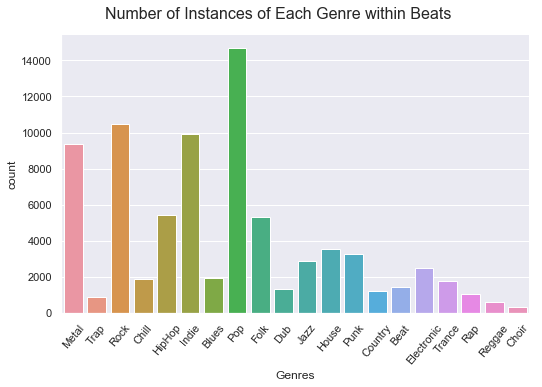

In [4]:
# View counts
ax = sns.catplot(x="Genres", data=beats, aspect=1.5, kind="count")
ax.fig.subplots_adjust(top=0.9)
ax.set_xticklabels(rotation=50)
ax.fig.suptitle('Number of Instances of Each Genre within Beats', fontsize=16)
plt.show()

*Observations*: Unsuprisingly, it appears that music genre, 'Pop', is by far the most prevalant in the dataset. 'Rock', 'Indie', and 'Metal' also have noteably high value counts. All four of these genres are generally considered popular in the United States.

#### Assessing Correlation of Co-Efficients

In [5]:
# Create a correlation dataframe
feature_corr = beats.corr()
feature_corr

,Danceability,Energy,Key,Loudness,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,time_signature
Danceability,1.000000,-0.092582,0.021131,0.023954,-0.068656,0.148786,0.007536,-0.166483,-0.127176,0.435865,-0.164038,-0.119508,0.166331
Energy,-0.092582,1.000000,0.022126,0.748526,-0.016268,0.108031,-0.682929,-0.056565,0.188573,0.170990,0.194522,-0.020817,0.135185
Key,0.021131,0.022126,1.000000,0.006782,-0.162377,0.026844,-0.021709,0.009263,-0.003239,0.022569,0.001997,0.011848,0.009242
Loudness,0.023954,0.748526,0.006782,1.000000,-0.011441,0.099304,-0.531661,-0.279681,0.114625,0.172805,0.127598,-0.129089,0.119426
Mode,-0.068656,-0.016268,-0.162377,-0.011441,1.000000,-0.052694,0.023385,-0.045873,0.001060,0.018334,0.021597,-0.054014,-0.009462
Speechness,0.148786,0.108031,0.026844,0.099304,-0.052694,1.000000,-0.046881,-0.123818,0.081467,0.061284,0.032455,-0.091972,0.039716
Acousticness,0.007536,-0.682929,-0.021709,-0.531661,0.023385,-0.046881,1.000000,0.002949,-0.103095,-0.046791,-0.152206,-0.084129,-0.132087
Instrumentalness,-0.166483,-0.056565,0.009263,-0.279681,-0.045873,-0.123818,0.002949,1.000000,-0.024044,-0.282278,0.008561,0.337332,-0.042506
Liveness,-0.127176,0.188573,-0.003239,0.114625,0.001060,0.081467,-0.103095,-0.024044,1.000000,-0.012004,0.034633,-0.006948,-0.001916
Valence,0.435865,0.170990,0.022569,0.172805,0.018334,0.061284,-0.046791,-0.282278,-0.012004,1.000000,0.024859,-0.254920,0.109231


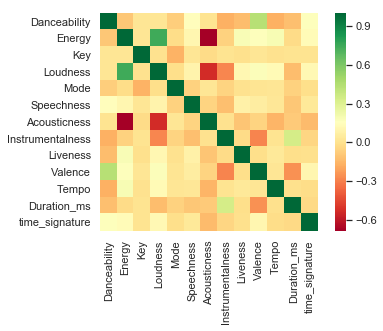

In [6]:
# Plot a correlation heatmap
sns.heatmap(feature_corr, square=True, cmap='RdYlGn')

*Observations*: It appears that the strongest correlations are between **Energy and Loudness (+0.748526)** followed by **Energy and Acousticness (-0.682929)**, **Loudness and Acousticness (-0.531661)**, **Danceability and Valence (+0.435865)**, and a weaker, but still notable, correlation between **Duration_ms and Instrumentalness (+0.337332)**.

#### General Genre Clusters Based on Top Features

In [7]:
# Import necessary modules
import plotly # has packages for large datasets
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.cm as cm
from IPython.display import IFrame

In [8]:
# Define x and y variables
energy_y = abs(beats['Energy'])
loudness_y = abs(beats['Loudness'])

In [ ]:
# All graphs were plotted with the corresponding code with variations to X and Y variables
trace = go.Scattergl(x = energy_y,
                y = loudness_y,
                mode = 'markers',
                marker = dict(line = dict(width = 1))
                            )
data = [trace]    
layout = dict(showlegend=False)
fig=dict(data=data, layout=layout)
py.plot(fig)

1. Top Feature by Top Feature
x = energy_y
y = loudness_y

In [15]:
# View graph
IFrame(src='//plot.ly/~emilyschoof/26.embed', width=600, height=500)

2. Top Feature 1 by Music Genre
x = beats['Genres']
y = loudness_y

In [13]:
# View graph
IFrame(src='//plot.ly/~emilyschoof/20.embed', width=600, height=500)

3. Top Feature 2 by Music Genre
x = beats['Genres']
y = energy_y

In [14]:
IFrame(src='//plot.ly/~emilyschoof/22.embed', width=600, height=500)